In [47]:
from math import copysign,sqrt
import matplotlib
from statistics import *
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import color
from skimage import io
from skimage.util import view_as_blocks
from sklearn.feature_extraction import image
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import FastICA, PCA
import seaborn as sns
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.io import wavfile

import matplotlib.pyplot as plt
sns.set()
import wave
import sys

In [66]:
np.random.seed(123)

First,	pull	2	times	10000	samples	from a Laplacian	
distribution	

In [67]:
#Signal Arrays

In [85]:
first_array = [np.random.laplace() for x in range(10000)]
second_array =[np.random.laplace() for x in range(10000)]

In [86]:
S = np.zeros((2,10000))

In [87]:
# fill the array with the lapplace distribution values

In [88]:
S[0,:] = first_array
S[1,:] = second_array

In [89]:
S.T

array([[ 1.72604041,  0.34057731],
       [-2.71472924,  0.19093637],
       [ 0.69778547, -0.11542926],
       ...,
       [-0.08966309,  1.90315614],
       [ 0.34706826,  0.58791026],
       [-0.83597683,  1.54091831]])

In [90]:
S.shape

(2, 10000)

mix the values randomly, so we choose one of a column and then add it to the new one, but randomly the first or second

In [91]:
r = np.random.choice([True, False], 2)

In [92]:
z = S.copy()
z[r] = S[r]

In [93]:
z.shape

(2, 10000)

In [94]:
S = z

In [95]:
A = np.random.rand(2,2);


In [96]:
A

array([[0.33803011, 0.12082353],
       [0.71048911, 0.82440558]])

We multiply the Signal of 2x10000 shape with a random array of 2x1 shape to get the Sensor X

In [97]:
X=A.dot(S)

In [98]:
X

array([[ 0.62460338, -0.89459062,  0.22192593, ...,  0.19963722,
         0.18835292, -0.09640615],
       [ 1.50710674, -1.77137654,  0.40060845, ...,  1.50526789,
         0.73126471,  0.67638922]])

now we want to plot X and S and see how they differ

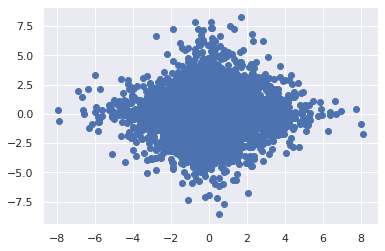

In [99]:
plt.scatter(S[0,:],S[1,:])
plt.show() 

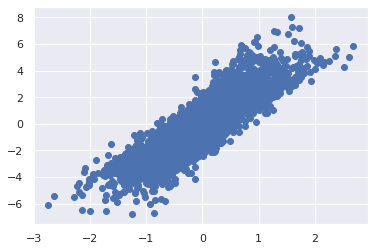

In [100]:
plt.scatter(X[0,:],X[1,:])
plt.show() 

Here we can wondersully see the laplace distribution plotted against each other 

Second ex

In [101]:
pca = PCA()

The numpy. matmul() function returns the matrix product of two arrays. While it returns a normal product for 2-D arrays, if dimensions of either argument is >2, it is treated as a stack of matrices residing in the last two indexes and is broadcast accordingly

In [102]:
W = pca.fit_transform(S)
X_pca = pca.components_.T
print(X_pca.shape)
print(W.shape)
S_reconstruct = np.matmul(X_pca,W.T).T
print(S_reconstruct.shape)

(10000, 2)
(2, 2)
(2, 10000)


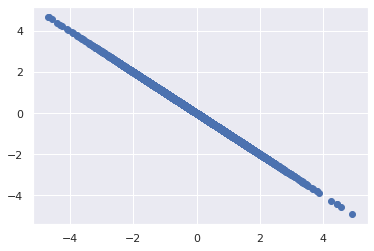

In [103]:
plt.scatter(S_reconstruct[0,:],S_reconstruct[1,:])
plt.show() 

We can see that the data has a variance of 0,  so PCA is -1, but thtas not correct, because we follow a Gaussian distribution with the PCA, which does not result in correct results in this ex

### Now we go to numner 3, the ICA

In [104]:
ica = FastICA()

In [105]:
X = X.T
X.shape


(10000, 2)

In [106]:
X_transposed = ica.fit_transform(X)  # Reconstruct signalsS_.shapeX_transformed.shape


In [107]:
X_transposed.shape

(10000, 2)

### We have to transpose the Matrix because we want to run ica



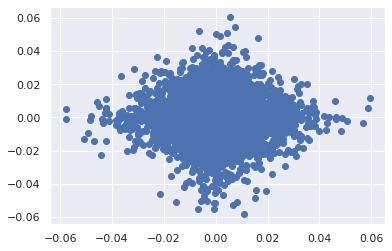

In [108]:
plt.scatter(X_transposed[:,0],X_transposed[:,1])
plt.show() 

We can see that the ica method recreated the picture well

### Now the last exercise, we want to mount the guitar sounds

In [110]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### I am using a different wav file, because the wave of the teacher is 24 bit file, which creates errors to read in

In [111]:
path_to_audio = "/content/gdrive/My Drive/data"
mix1 = '/content/gdrive/My Drive/data/ICA_mix_1.wav'
mix2 = '/content/gdrive/My Drive/data/ICA_mix_2.wav'


In [112]:
import os
os.chdir("/content/gdrive/My Drive/data/")
!ls

ICA_mix_1.wav  ICA_mix_2.wav  result_signal_1.wav  result_signal_2.wav


We want to read in the wav file and plot it

In [113]:
mix_1_wave = wave.open(mix1,'r')
mix_2_wave = wave.open(mix2,'r')


In [114]:
mix_1_wave.getparams()


_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')

In [115]:
# Extract Raw Audio from Wav File
signal_1_raw = mix_1_wave.readframes(-1)
signal_1 = np.frombuffer(signal_1_raw, 'Int16')

#Extract Raw Audio from Wav File
signal_raw_2 = mix_2_wave.readframes(-1)
signal_2 = np.frombuffer(signal_raw_2, 'Int16')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  import sys


In [116]:
'length: ', len(signal_1) , 'first 100 elements: ',signal_1[:100]


('length: ',
 264515,
 'first 100 elements: ',
 array([  879,  1268,  1460,  1756,  1943,  2216,  2407,  2668,  2866,
         3106,  3308,  3546,  3752,  3981,  4175,  4395,  4588,  4790,
         4966,  5146,  5292,  5436,  5550,  5643,  5717,  5759,  5790,
         5798,  5789,  5756,  5713,  5649,  5576,  5478,  5381,  5267,
         5146,  4999,  4856,  4682,  4502,  4308,  4097,  3875,  3637,
         3380,  3107,  2825,  2514,  2194,  1847,  1472,  1087,   671,
          227,  -219,  -691, -1176, -1666, -2167, -2669, -3179, -3668,
        -4170, -4643, -5116, -5559, -5985, -6380, -6765, -7105, -7422,
        -7706, -7955, -8163, -8339, -8470, -8557, -8600, -8618, -8585,
        -8524, -8425, -8298, -8129, -7947, -7720, -7475, -7205, -6916,
        -6606, -6266, -5922, -5556, -5165, -4774, -4353, -3922, -3476,
        -3021], dtype=int16))

In [117]:
mix_1_wave.getframerate()

44100

In [118]:
signal_1

array([  879,  1268,  1460, ...,  9204,  9553, 10006], dtype=int16)

We want to normalize so that we can comapre better the resulting ICA later


In [129]:
from sklearn.preprocessing import normalize


In [130]:
signal_1 = normalize(signal_1[:,np.newaxis], axis=0).ravel()
signal_2 = normalize(signal_2[:,np.newaxis], axis=0).ravel()


(-0.01, 0.01)

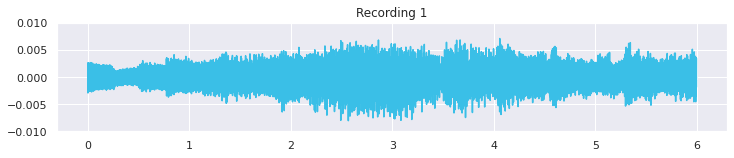

In [131]:

fs = mix_1_wave.getframerate()
timing = np.linspace(0, len(signal_1)/fs, num=len(signal_1))

plt.figure(figsize=(12,2))
plt.title('Recording 1')
plt.plot(timing,signal_1, c="#3ABFE7")
plt.ylim(-0.010, 0.010)


(-0.01, 0.01)

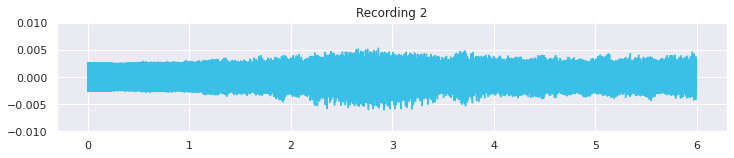

In [132]:
fs = mix_2_wave.getframerate()
timing_2 = np.linspace(0, len(signal_1)/fs, num=len(signal_1))

plt.figure(figsize=(12,2))
plt.title('Recording 2')
plt.plot(timing,signal_2, c="#3ABFE7")
plt.ylim(-0.010, 0.010)


### Wonderful graph of the wav first mix and second

Now that we’ve read all two files, we’re ready to zip them to create our dataset.






In [133]:
X = list(zip(signal_1, signal_2))

In [134]:
# Initialize FastICA
ica = FastICA()

# Run the FastICA algorithm using fit_transform on dataset X
ica_result = ica.fit_transform(X)

In [135]:
ica_result.shape


(264515, 2)

In [136]:
result_signal_1 = ica_result[:,0]
result_signal_2 = ica_result[:,1]

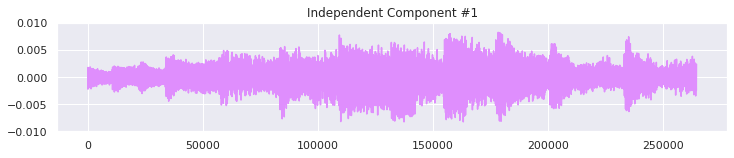

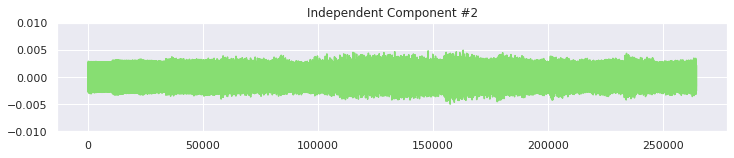

In [137]:
# Plot Independent Component #1
plt.figure(figsize=(12,2))
plt.title('Independent Component #1')
plt.plot(result_signal_1, c="#df8efd")
plt.ylim(-0.010, 0.010)
plt.show()

# Plot Independent Component #2
plt.figure(figsize=(12,2))
plt.title('Independent Component #2')
plt.plot(result_signal_2, c="#87de72")
plt.ylim(-0.010, 0.010)
plt.show()


The ICA creates outputs which are in a very small range (0.01 to -0.01). However the given data is between 20.000 and -20.000, so if I try to perform the MSE on that it does not work, because they are in different scales, thats why we had normalized the signal input in the beginning. 

In [138]:
print(type(result_signal_1))
print(type(signal_1))



<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [139]:
print(len(result_signal_1))
print(len(signal_1))


264515
264515


use np to create mean squared error 

In [140]:
mse1 = mean_squared_error(signal_1, result_signal_1)

now for the second 

In [141]:
mse2 = mean_squared_error(signal_2, result_signal_2)

In [142]:
mse1

1.6956485844696226e-06

In [143]:
mse2

1.4725984992744216e-05

We get a Mean squarred error of 1.69 for the first signal processing and a MSE of 1.15 for the second quite big for such a small amplitude !

## Mean Absolute Error

Now we can also search for the accuracy by building the sum over all values and dviding by the amount of values we have, we use the sklearn libary for that

In [144]:
abserr1 = mean_absolute_error(signal_1, result_signal_1)
abserr1

0.001119404054919759

In [145]:
abserr2 = mean_absolute_error(signal_2, result_signal_2)
abserr2

0.003373620200407625

Very small, this means ICA works very precise

Now, save the files as wave files. This requires:

convert them to integer (so we can save as PCM 16-bit Wave files), otherwise only some media players would be able to play them and others won’t
Map the values to the appropriate range for int16 audio. That range is between -32768 and +32767. A basic mapping can be done by multiplying by 32767.
The sounds will be a little faint, we can increase the volume by multiplying by a value like 100

In [146]:

# Convert to int, map the appropriate range, and increase the volume a little bit
result_signal_1_int = np.int16(result_signal_1*32767*100)
result_signal_2_int = np.int16(result_signal_2*32767*100)

# Write wave files
wavfile.write(path_to_audio + "/result_signal_1.wav", fs, result_signal_1_int)
wavfile.write(path_to_audio + "/result_signal_2.wav", fs, result_signal_2_int)

Ex completed now we want compare with our own ears